In [216]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [217]:
graffiti = pd.read_csv('data/311_Graffiti_Removal.csv') 

In [218]:
#Remove duplicates
graffiti = graffiti[~graffiti['Status'].str.contains("Dup", na=False)] 

#Drop unrelated columns
graffiti = graffiti.drop(['Service Request Number', 'Type of Service Request','Police District', 'SSA', 'Ward', 'X Coordinate','Y Coordinate'], axis = 1)

#Remove NANs
graffiti = graffiti.dropna()

#Remove Community Area 0(which doesnt exist) & reset index
graffiti = graffiti[graffiti['Community Area'] != 0.0].reset_index(drop = True)

In [219]:
#check if total is 77 community areas
graffiti['Community Area'].unique().size

#total num of requests 
graffiti.size 

10528452

In [220]:
graffiti.head()

,Creation Date,Status,Completion Date,What Type of Surface is the Graffiti on?,Where is the Graffiti located?,Street Address,ZIP Code,Community Area,Latitude,Longitude,Location
0,08/07/2017,Completed,08/07/2017,Metal - Painted,Door,7125 S MAPLEWOOD AVE,60629.0,66.0,41.763870,-87.686746,"(41.763869831543, -87.686745609992)"
1,08/05/2017,Completed,08/07/2017,Wood - Painted,Front,4409 N ARTESIAN AVE,60625.0,4.0,41.961625,-87.689770,"(41.961624847715, -87.689769617066)"
2,08/07/2017,Completed,08/07/2017,Metal - Painted,Dumpster,1557 W 13TH ST,60608.0,28.0,41.864972,-87.666236,"(41.864971765967, -87.666235774755)"
3,08/07/2017,Completed,08/07/2017,Metal - Painted,Dumpster,3510 N KEDZIE AVE,60618.0,21.0,41.945151,-87.707931,"(41.945150637173, -87.707931420187)"
4,08/05/2017,Completed,08/07/2017,Aluminum Siding,Alley,2520 N KILBOURN AVE,60639.0,20.0,41.927055,-87.739237,"(41.927055331341, -87.739236892785)"


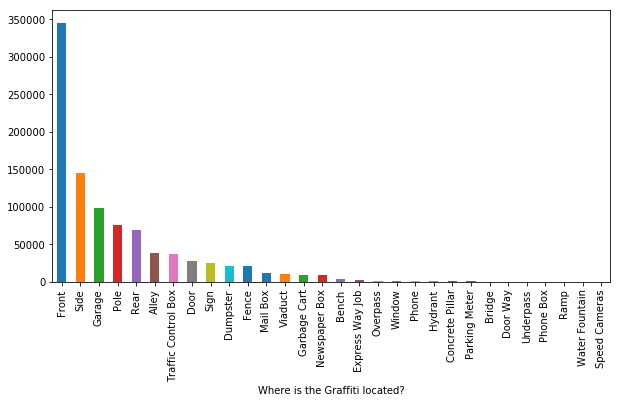

In [221]:
#Find most common graffiti locaions
drop_vals = ['Express Way Job - DSS will NOT remove']
graffiti_l = graffiti[~graffiti['Where is the Graffiti located?'].isin(drop_vals)].reset_index(drop = True)

graf_locations = graffiti_l.groupby(['Where is the Graffiti located?']).count().sort_values(by = 'Creation Date', ascending=False)
graf_locations['Creation Date'].plot.bar(x = 'Where is the Graffiti located?', y = 'Creation Date', figsize = (10,5))


In [222]:
#Create YEAR only column
graffiti['Year Created'] = graffiti['Creation Date'].str.extract('(20\d\d)', expand=True)

#Create MONTH only column
graffiti['Month Created'] = graffiti['Creation Date'].str.extract('(\d\d)', expand=True)
graffiti['Month Created'] = pd.to_numeric(graffiti['Month Created'])

#DROP years 2004-2010 b/c of inconsistant/outliar vals
drop_years = ['2004','2006','2007','2008','2009','2010']
graffiti_cln = graffiti[~graffiti['Year Created'].isin(drop_years)].reset_index(drop = True)


In [223]:
graffiti_cln.head()

,Creation Date,Status,Completion Date,What Type of Surface is the Graffiti on?,Where is the Graffiti located?,Street Address,ZIP Code,Community Area,Latitude,Longitude,Location,Year Created,Month Created
0,08/07/2017,Completed,08/07/2017,Metal - Painted,Door,7125 S MAPLEWOOD AVE,60629.0,66.0,41.763870,-87.686746,"(41.763869831543, -87.686745609992)",2017,8
1,08/05/2017,Completed,08/07/2017,Wood - Painted,Front,4409 N ARTESIAN AVE,60625.0,4.0,41.961625,-87.689770,"(41.961624847715, -87.689769617066)",2017,8
2,08/07/2017,Completed,08/07/2017,Metal - Painted,Dumpster,1557 W 13TH ST,60608.0,28.0,41.864972,-87.666236,"(41.864971765967, -87.666235774755)",2017,8
3,08/07/2017,Completed,08/07/2017,Metal - Painted,Dumpster,3510 N KEDZIE AVE,60618.0,21.0,41.945151,-87.707931,"(41.945150637173, -87.707931420187)",2017,8
4,08/05/2017,Completed,08/07/2017,Aluminum Siding,Alley,2520 N KILBOURN AVE,60639.0,20.0,41.927055,-87.739237,"(41.927055331341, -87.739236892785)",2017,8


In [224]:
#Plot total graffiti requests per month

# graffiti_by_month = 
# graffiti_cln.groupby(['Month Created']).count()['Creation Date']
# graffiti_by_month.plot.line(x = 'Month Created', y = 'Creation Date')

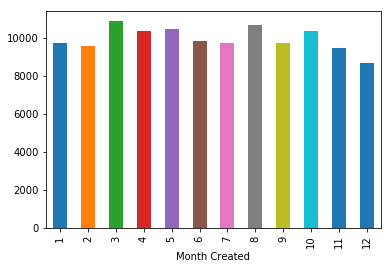

In [225]:
graffiti_mon_yr = graffiti_cln.groupby(['Month Created','Year Created', ]).count()['Creation Date'].unstack()
graffiti_mon_avg = graffiti_mon_yr.mean(axis=1)
graffiti_mon_avg.plot.bar()


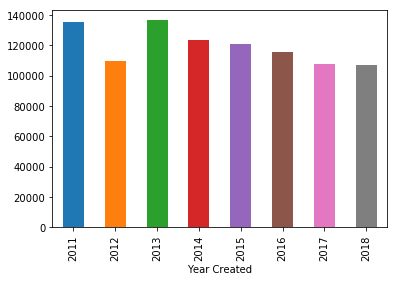

In [226]:
#Plot total graffiti requests per year

graffiti_by_year = graffiti_cln.groupby(['Year Created']).count()['Creation Date']
graffiti_by_year.plot.bar(x = 'Year Created', y = 'Creation Date')

# #seaborn
# graffiti_by_year = graffiti_by_year.reset_index()
# sns.barplot(x = 'Year Created', y = 'Creation Date', data =graffiti_by_year)

In [227]:
graffiti_by_year

Year Created
2011    135101
2012    109448
2013    136533
2014    123775
2015    120896
2016    115673
2017    107845
2018    106725
Name: Creation Date, dtype: int64

In [228]:
#Total reqs per community area for each year
graffiti_area_year = graffiti_cln.groupby(['Community Area','Year Created']).count()['Creation Date'].unstack()

# #total reqs for each area
# all_years = ['2011','2013','2013','2014','2015','2016','2017','2018']
# graffiti_area_year['Total'] = (graffiti_area_year[all_years].sum(axis=1))

graffiti_area_year.head()

Year Created,2011,2012,2013,2014,2015,2016,2017,2018
Community Area,,,,,,,,
1.0,2573,1344,1653,1451,1675,1393,1383,1481
2.0,1713,1885,2670,2915,3268,2263,1502,1111
3.0,1956,1439,1419,1579,2121,1785,1747,2211
4.0,1800,1405,2346,2985,3148,3774,3159,3724
5.0,2090,1595,2300,2453,3008,3285,3283,4164


In [229]:
#Calculate what percent of graffiti requests was in each community area, from the total in that that year 
graffiti_percent = (graffiti_area_year / graffiti_by_year)*100
graffiti_percent.head()

Year Created,2011,2012,2013,2014,2015,2016,2017,2018
Community Area,,,,,,,,
1.0,1.904501,1.227980,1.210696,1.172288,1.385488,1.204257,1.282396,1.387679
2.0,1.267940,1.722279,1.955571,2.355080,2.703150,1.956377,1.392740,1.040993
3.0,1.447806,1.314780,1.039309,1.275702,1.754400,1.543143,1.619917,2.071680
4.0,1.332337,1.283715,1.718266,2.411634,2.603891,3.262646,2.929204,3.489342
5.0,1.546991,1.457313,1.684574,1.981822,2.488089,2.839902,3.044184,3.901616


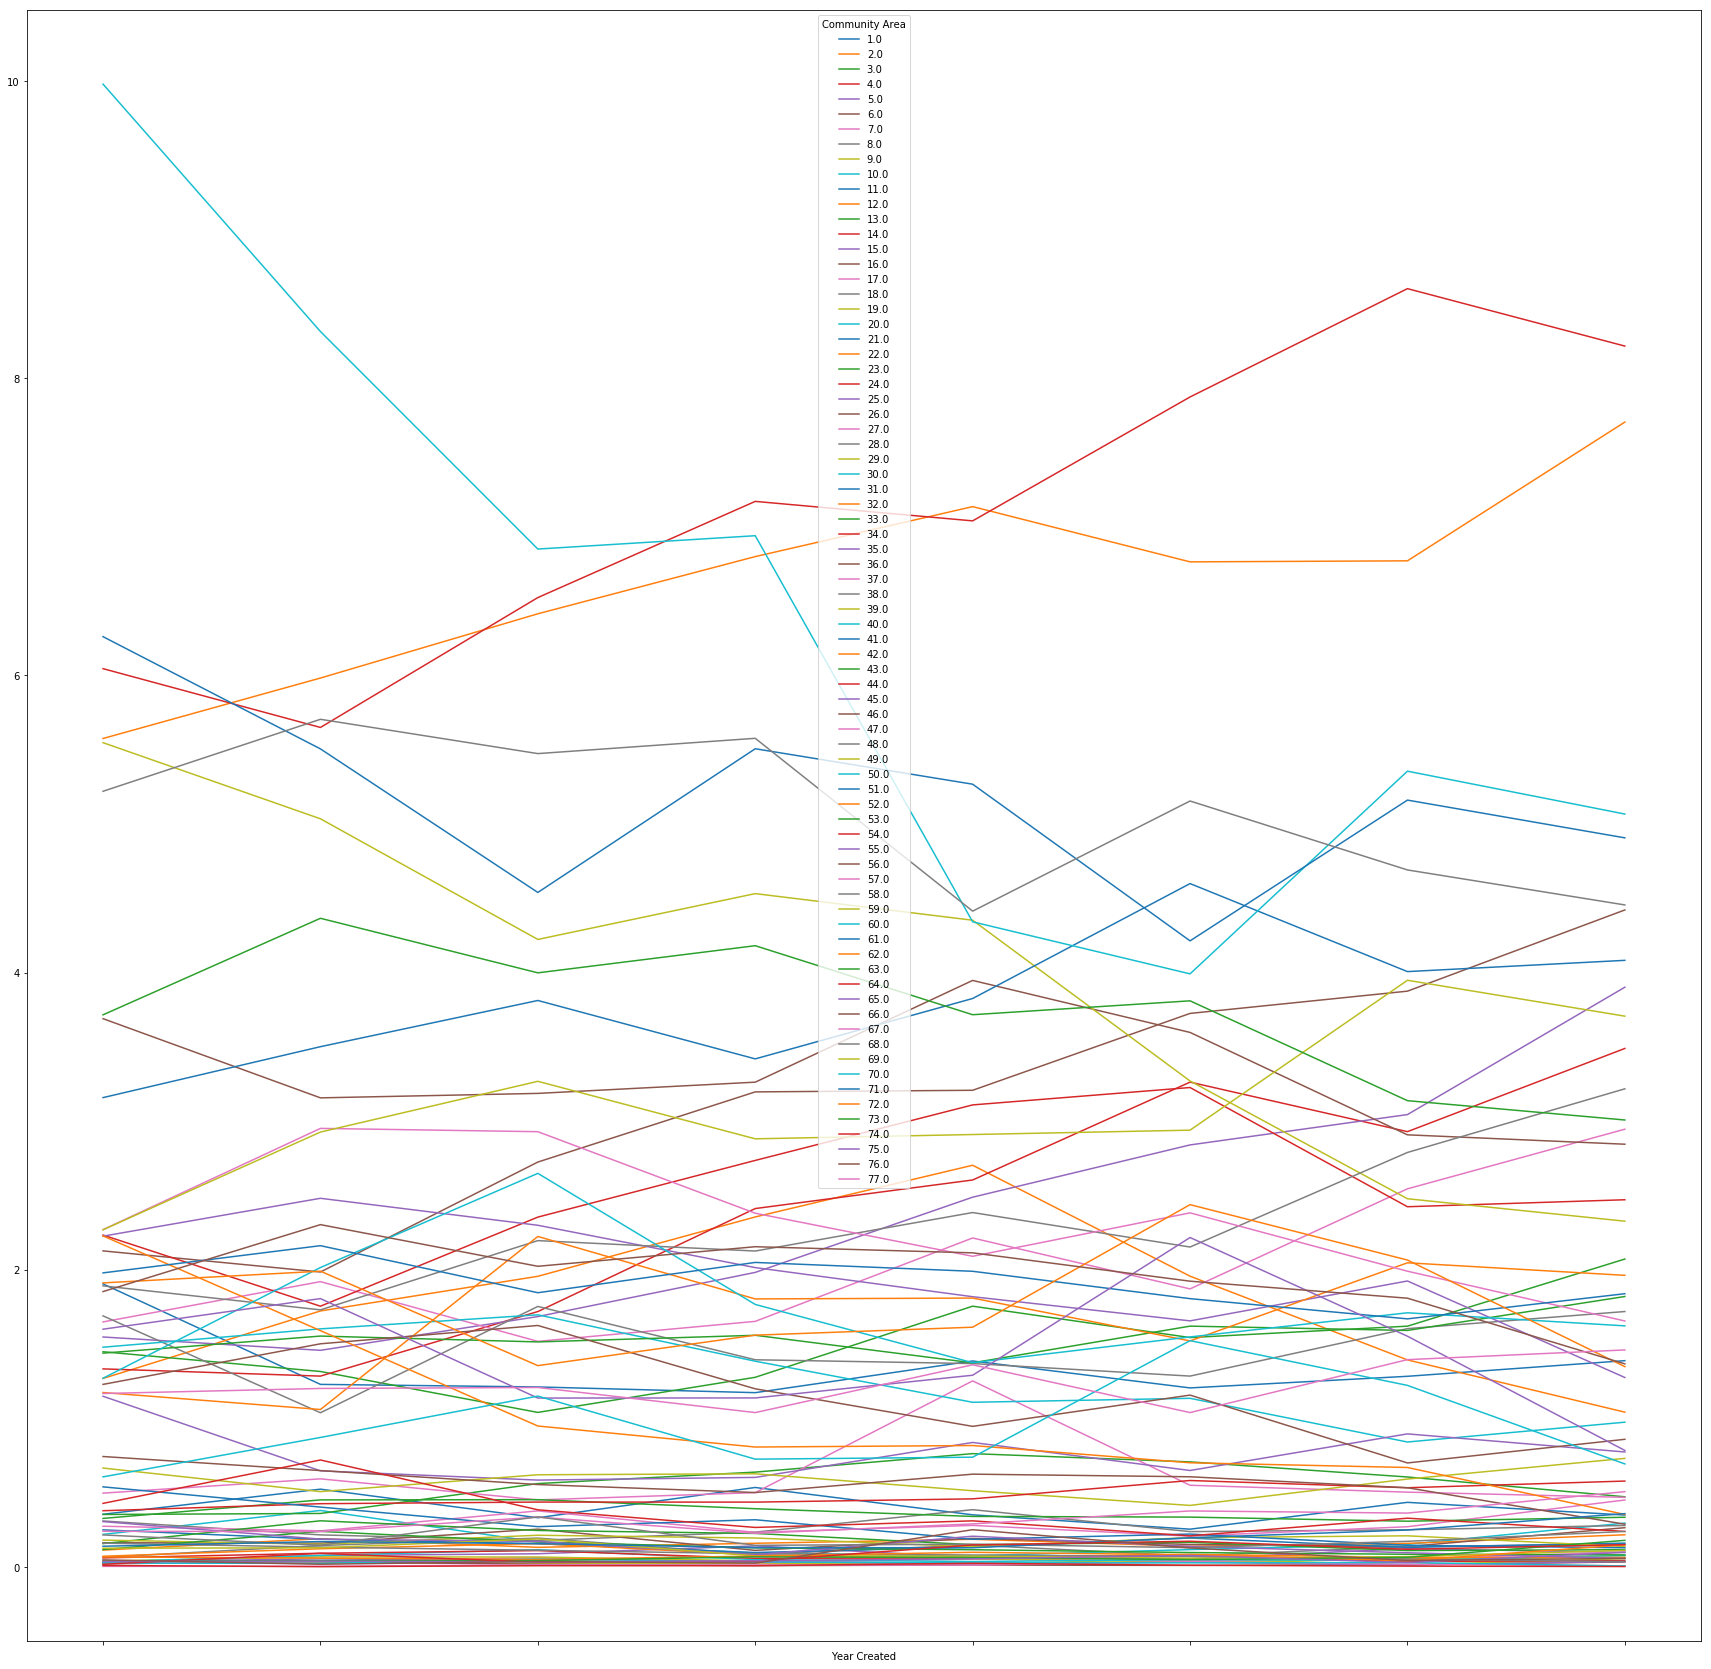

In [230]:
graffiti_percent_transpose = graffiti_percent.transpose()
graffiti_percent_transpose.plot(figsize = (30,30)) 
graffiti_percent_transpose.to_csv('graffiti_percent_transpose.csv')

In [231]:
graffiti_percent["Diff 17-11"] = graffiti_percent["2017"]-graffiti_percent["2011"]
graffiti_percent["Diff 16-11"] = graffiti_percent["2016"]-graffiti_percent["2011"]
graffiti_percent.head()

Year Created,2011,2012,2013,2014,2015,2016,2017,2018,Diff 17-11,Diff 16-11
Community Area,,,,,,,,,,
1.0,1.904501,1.227980,1.210696,1.172288,1.385488,1.204257,1.282396,1.387679,-0.622105,-0.700244
2.0,1.267940,1.722279,1.955571,2.355080,2.703150,1.956377,1.392740,1.040993,0.124799,0.688437
3.0,1.447806,1.314780,1.039309,1.275702,1.754400,1.543143,1.619917,2.071680,0.172112,0.095337
4.0,1.332337,1.283715,1.718266,2.411634,2.603891,3.262646,2.929204,3.489342,1.596867,1.930309
5.0,1.546991,1.457313,1.684574,1.981822,2.488089,2.839902,3.044184,3.901616,1.497193,1.292911


In [232]:
graffiti_percent.to_csv('graffiti_percent_change.csv')

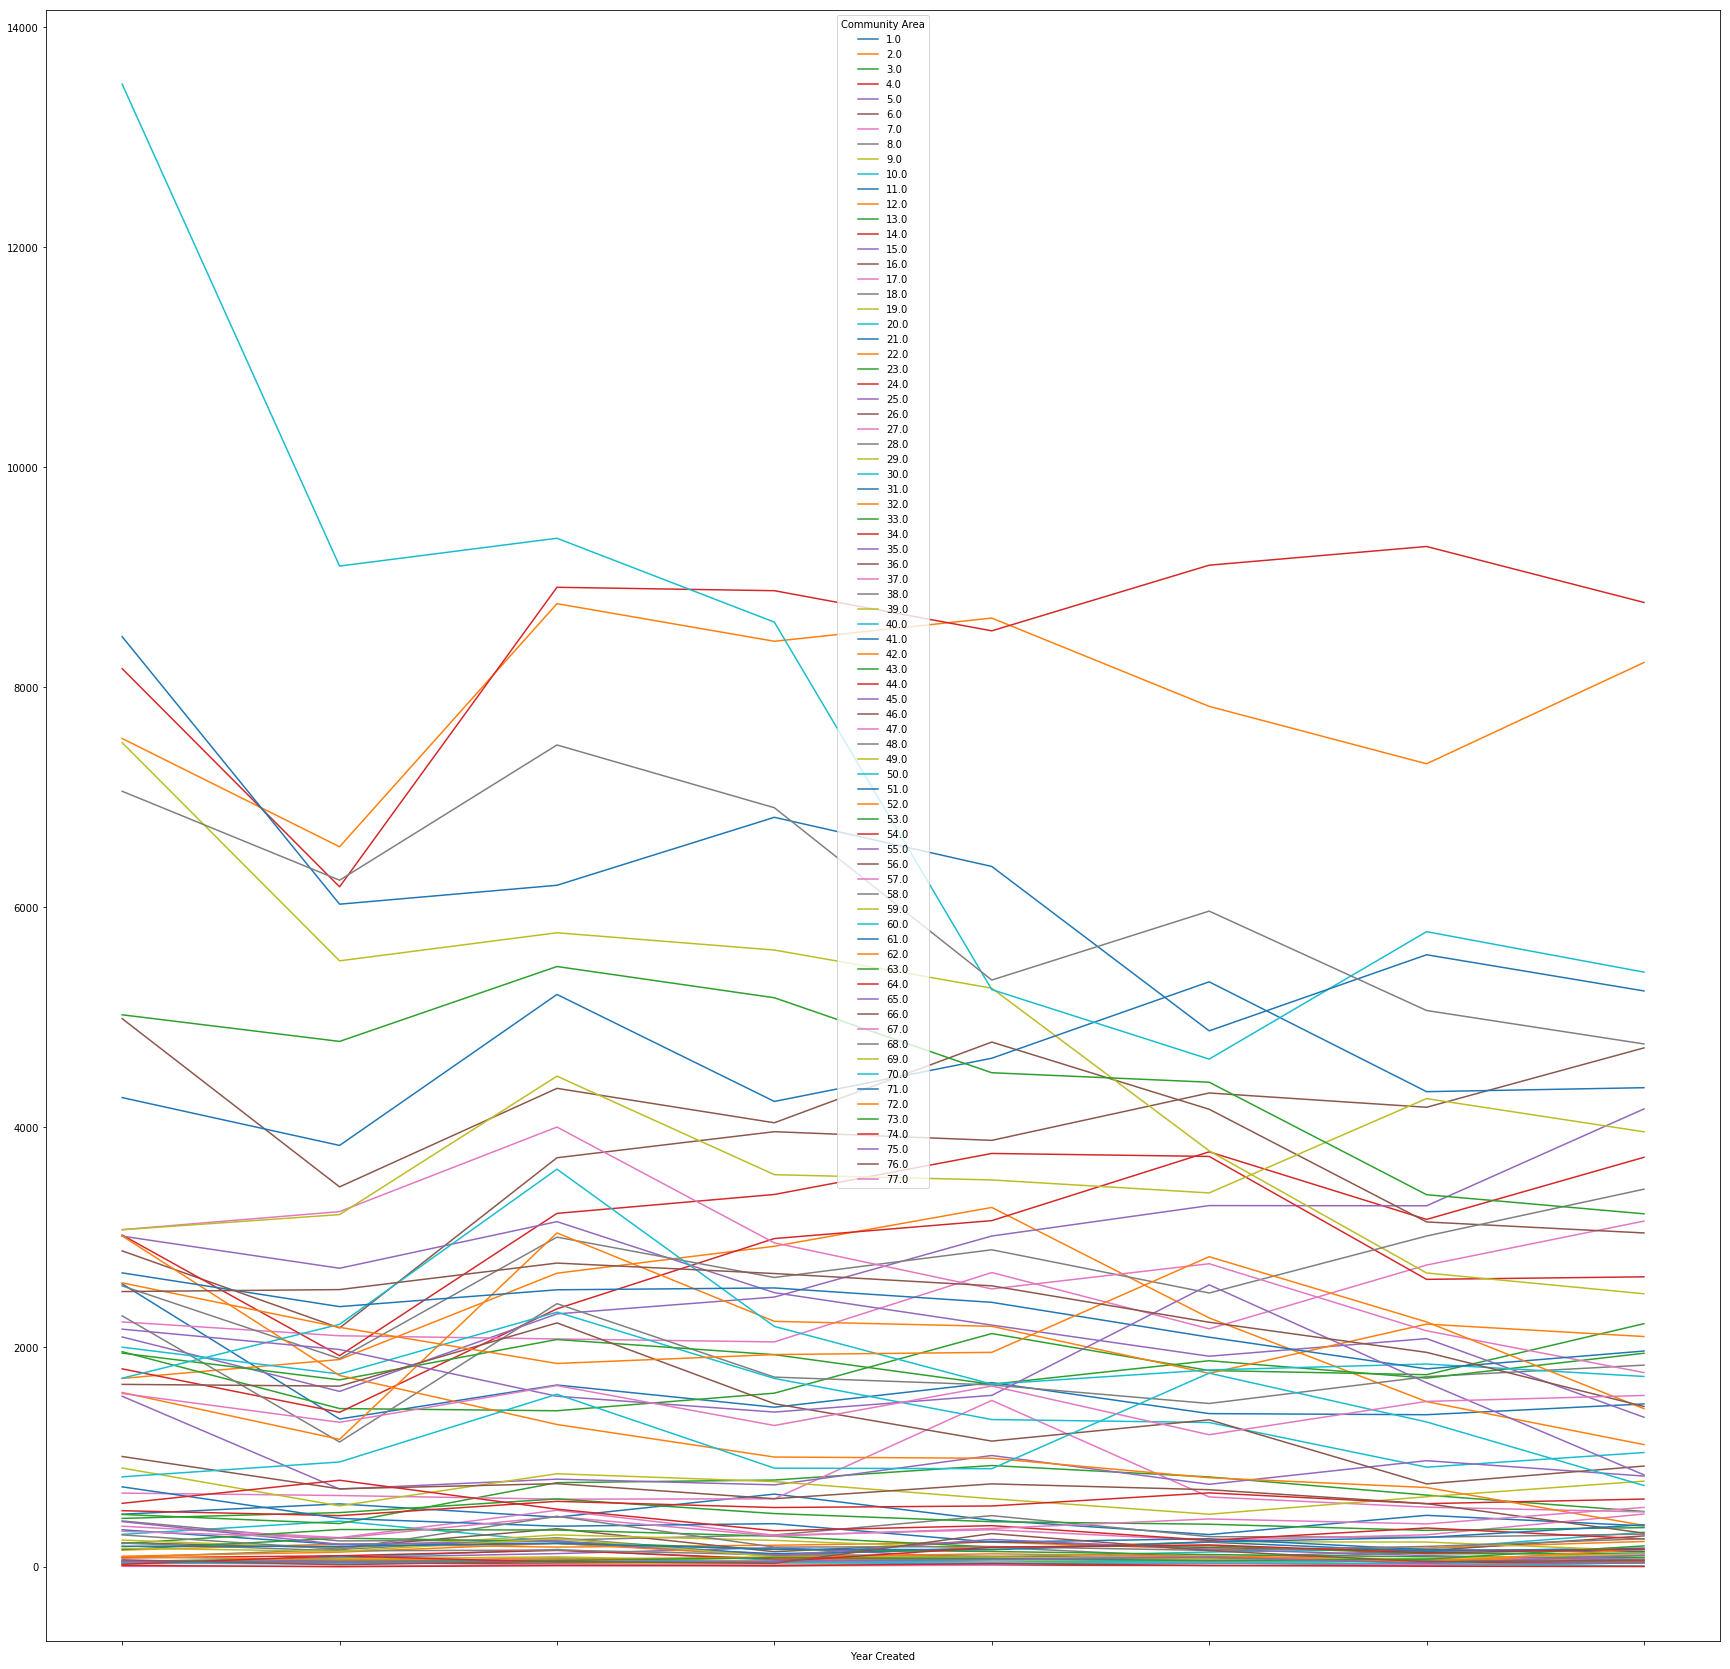

In [233]:
#Total reqs per year for each community area
graffiti_year_area = graffiti_cln.groupby(['Year Created', 'Community Area']).count()['Creation Date'].unstack()
graffiti_year_area.plot(figsize = (30,30)) 

In [234]:
#UNEMPLOYMENT
unemployment_base = pd.read_csv('data/Unemployment_indicator.csv')

unemployment = pd.pivot_table(unemployment_base, values= 'Percent', index = "Geo_ID", columns = ['Year'])
del unemployment.index.name
del unemployment.columns.name

unemployment['Diff06-16'] = unemployment['2012-2016'] - unemployment['2006-2010']
unemployment = unemployment.reset_index()
unemployment.to_csv('unemployment_percent.csv')

unemployment.head()

,index,2006-2010,2011-2015,2012-2016,Diff06-16
0,1,7.5,9.8,8.9,1.4
1,2,7.9,8.8,9.2,1.3
2,3,7.7,9.8,8.3,0.6
3,4,6.8,7.2,6.2,-0.6
4,5,4.5,4.2,4.2,-0.3


In [235]:
college_grad = pd.read_csv('college_grad_cln.csv')

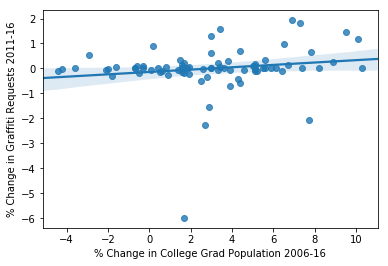

In [236]:
# del graffiti_percent.index.name

scatter = pd.DataFrame()
scatter['% Change in College Grad Population 2006-16'] = college_grad['Diff_06-16']
scatter.index = scatter.index + 1
scatter['% Change in Graffiti Requests 2011-16'] = graffiti_percent['Diff 16-11']

sns.regplot(x = '% Change in College Grad Population 2006-16', y = '% Change in Graffiti Requests 2011-16', data = scatter )

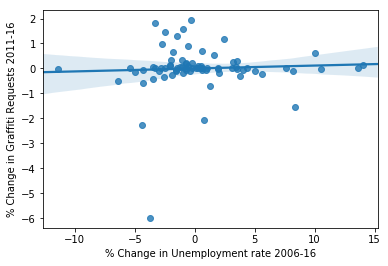

In [237]:
scatter['% Change in Unemployment rate 2006-16'] = unemployment['Diff06-16']
sns.regplot(x = '% Change in Unemployment rate 2006-16', y = '% Change in Graffiti Requests 2011-16' , data = scatter )

In [206]:
#Non hispanic white
white_base = pd.read_csv('data/Non-Hispanic_White_population.xlsx - Indicator.csv')

white = pd.pivot_table(white_base, values= 'Percent', index = "Geo_ID", columns = ['Year'])
del white.index.name
del white.columns.name

white['Diff06-16'] = white['2012-2016'] - white['2006-2010']
white.to_csv('white_percent.csv')
white.head()


,2006-2010,2012-2016,Diff06-16
1,38.0,42.20,4.20
2,43.2,43.70,0.50
3,50.2,54.60,4.40
4,63.3,64.40,1.10
5,77.9,76.65,-1.25


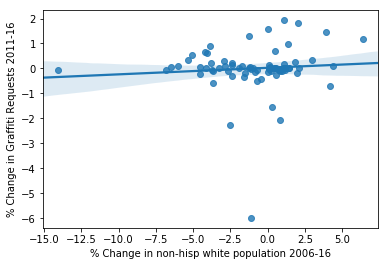

In [238]:
scatter['% Change in non-hisp white population 2006-16'] = white['Diff06-16']
sns.regplot(x = '% Change in non-hisp white population 2006-16', y = '% Change in Graffiti Requests 2011-16', data = scatter )


In [240]:
# sns.regplot(x = 'Chnage in non-hispanic white population 2010 2016' , y = 'graf_diff_16_11', data = scatter)

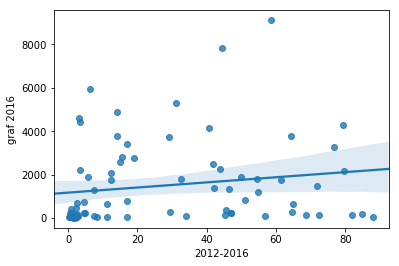

In [212]:
# scatter['2012-2016'] = white['2012-2016']
# scatter['graf 2016'] = graffiti_area_year['2016']

# sns.regplot(x = '2012-2016', y = 'graf 2016', data = scatter )
# # white['2012-2016']

In [ ]:
#This doesn't really matter

#drop rows with certain graffiti locations.
# drop_vals = ['Express Way Job - DSS will NOT remove']
# graffiti_cln = graffiti_cln[~graffiti_cln['Where is the Graffiti located?'].isin(drop_vals)].reset_index(drop = True)

#Convert year to number
# graffiti_cln['Year Created'] = pd.to_numeric(graffiti_cln['Year Created'], downcast = 'integer')

# years = ['2013','2014','2015','2016']
# graffiti_13_16 = graffiti_cln[graffiti_cln['Year Created'].isin(years)]
# graffiti_13_16.to_csv('graffiti_13_16.csv')